# Abalone_ord data set

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'abalone_ord' dataset by using pandas library

Abadata = pd.read_csv(r"D:\iiit notes\Internship\16 season 2 jun-2021\abalone_ord.csv", header = 0)
Abadata.head()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,1,0,0,1,0.075,0.055,0.01,0.0020,0.0010,0.0005,0.0015
1,1,0,0,1,0.130,0.100,0.03,0.0130,0.0045,0.0030,0.0040
2,1,0,0,1,0.110,0.090,0.03,0.0080,0.0025,0.0020,0.0030
3,1,0,0,1,0.165,0.120,0.03,0.0215,0.0070,0.0050,0.0050
4,1,1,0,0,0.210,0.150,0.05,0.0385,0.0155,0.0085,0.0100


In [3]:
# Display the dataset information 

Abadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   response  4177 non-null   int64  
 1   V1        4177 non-null   int64  
 2   V2        4177 non-null   int64  
 3   V3        4177 non-null   int64  
 4   V4        4177 non-null   float64
 5   V5        4177 non-null   float64
 6   V6        4177 non-null   float64
 7   V7        4177 non-null   float64
 8   V8        4177 non-null   float64
 9   V9        4177 non-null   float64
 10  V10       4177 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 359.1 KB


In [4]:
# Display the unique values for each varaiable

Abadata.nunique()

response      10
V1             2
V2             2
V3             2
V4           134
V5           111
V6            51
V7          2429
V8          1515
V9           880
V10          926
dtype: int64

In [5]:
# Display all values in the columns

for i in Abadata.columns:
    print(Abadata[i].value_counts())

3     1648
4     1388
5      432
2      431
6      125
7      100
8       29
1       17
9        4
10       3
Name: response, dtype: int64
0    2649
1    1528
Name: V1, dtype: int64
0    2870
1    1307
Name: V2, dtype: int64
0    2835
1    1342
Name: V3, dtype: int64
0.625    94
0.550    94
0.575    93
0.580    92
0.620    87
         ..
0.110     1
0.075     1
0.815     1
0.800     1
0.135     1
Name: V4, Length: 134, dtype: int64
0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.650      1
0.625      1
0.610      1
0.095      1
0.090      1
Name: V5, Length: 111, dtype: int64
0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.120    169
0.130    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.190    103
0.185    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215   

In [6]:
Abadata.describe()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,3.658846,0.365813,0.312904,0.321283,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,1.152090,0.481715,0.463731,0.467025,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,3.000000,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,3.000000,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,4.000000,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,10.000000,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [7]:
# Identify the Target and Independent variable

IndepVar = []

for col in Abadata.columns:
    if col != 'response':
        IndepVar.append(col)
        
TargetVar = 'response'

x = Abadata[IndepVar]
y = Abadata[TargetVar]

In [8]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Logistic Regression with random sampling

In [9]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression 
AbadataLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
AbadataLR = AbadataLR.fit(x_train,y_train)

In [10]:
# Predict the model with test data

y_pred = AbadataLR.predict(x_test)

In [11]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-10

lst_classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[  1   5   0   0   0   0   0   0   0   0]
 [  5  79  30   0   0   0   0   0   0   0]
 [  0  63 350 141  26   4   3   1   0   0]
 [  0   1 107 242  78  21  11   4   0   0]
 [  0   0   2  22  27   8   7   4   0   1]
 [  0   0   0   0   1   2   3   0   0   1]
 [  0   0   0   1   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Print Class: 0
TP=1, FP=5, TN=1243, FN=5
Accuracy: 0.992
Precision: 0.167
Sensitivity: 0.167
F1-Score: 0.167
Specificity: 0.996
Balanced Accuracy: 0.582
MCC: 0.163

Print Class: 1
TP=79, FP=35, TN=1071, FN=69
Accuracy: 0.917
Precision: 0.693
Sensitivity: 0.534
F1-Score: 0.603
Specificity: 0.968
Balanced Accuracy: 0.751
MCC: 0.564

Print Class: 2
TP=350, FP=238, TN=527, FN=139
Accuracy: 0.699
Precision: 0.595
Sensitivity: 0.716
F1-Score: 0.65
Specificity: 0.689
Balanced Accuracy: 0.702
MCC: 0.395

Print Class: 3
TP=242, FP=222, TN=626, FN=164
Accuracy: 0.692
Preci

In [12]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 91.18%
Precision: nan%
Recall or Sensitivity: nan%
F1-Score: 0.2334
Specificity or True Nagative Rate: 93.45%
Balanced Accuracy: nan%

MCC: nan



In [13]:
#transform confusion matrix into array 
#the matrix is stored in a vaiable called confmtrx 

confmtrx = np.array(confusion_matrix(y_test, y_pred))

In [14]:
# Create DataFrame from confmtrx array

pd.DataFrame(confmtrx, index=['response_1','response_2', 'response_3', 'response_4', 'response_5',
                              'response_6', 'response_7', 'response_8', 'response_9', 'response_10'],
columns=['predicted_res_1', 'predicted_res_2', 'predicted_res_3', 'predicted_res_4', 'predicted_res_5',
         'predicted_res_6', 'predicted_res_7', 'predicted_res_8', 'predicted_res_9', 'predicted_res_10'])

,predicted_res_1,predicted_res_2,predicted_res_3,predicted_res_4,predicted_res_5,predicted_res_6,predicted_res_7,predicted_res_8,predicted_res_9,predicted_res_10
response_1,1,5,0,0,0,0,0,0,0,0
response_2,5,79,63,1,0,0,0,0,0,0
response_3,0,30,350,107,2,0,0,0,0,0
response_4,0,0,141,242,22,0,1,0,0,0
response_5,0,0,26,78,27,1,2,0,0,0
response_6,0,0,4,21,8,2,0,0,0,0
response_7,0,0,3,11,7,3,0,0,1,0
response_8,0,0,1,4,4,0,0,0,0,0
response_9,0,0,0,0,0,0,0,0,0,0
response_10,0,0,0,0,1,1,0,0,0,0


# Decision tree


In [15]:
# To build the decision tree model with random sampling

from sklearn.tree import DecisionTreeClassifier

AbadataDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                    max_depth=3, max_features=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                    random_state=None, splitter='best')

AbadataDT = AbadataDT.fit(x_train,y_train)

In [16]:
# Display the algorithm parameters

params1 = AbadataDT.get_params()
print(params1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [17]:
# Predict the model with test data

y1_pred = AbadataDT.predict(x_test)

In [18]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-10

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[  1   5   0   0   0   0   0   0   0   0]
 [  5  79  30   0   0   0   0   0   0   0]
 [  0  63 350 141  26   4   3   1   0   0]
 [  0   1 107 242  78  21  11   4   0   0]
 [  0   0   2  22  27   8   7   4   0   1]
 [  0   0   0   0   1   2   3   0   0   1]
 [  0   0   0   1   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Print Class: 0
TP=0, FP=0, TN=1254, FN=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 1
TP=0, FP=0, TN=1248, FN=6
Accuracy: 0.995
Precision: nan
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: 0.5
MCC: nan

Print Class: 2
TP=83, FP=30, TN=1076, FN=65
Accuracy: 0.924
Precision: 0.735
Sensitivity: 0.561
F1-Score: 0.636
Specificity: 0.973
Balanced Accuracy: 0.767
MCC: 0.601

Print Class: 3
TP=345, FP=257, TN=508, FN=144
Accuracy: 0.68
Precision: 0.573
Sensitivity: 0.706


In [19]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 91.7727%
Precision: nan%
Recall or Sensitivity: nan%
F1-Score: nan
Specificity or True Nagative Rate: 93.8182%
Balanced Accuracy: nan%

MCC: nan



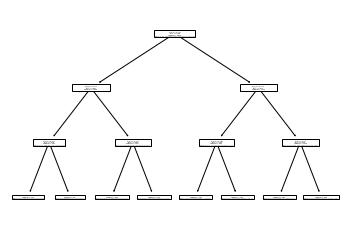

In [20]:
from sklearn import tree

tree.plot_tree(AbadataDT);

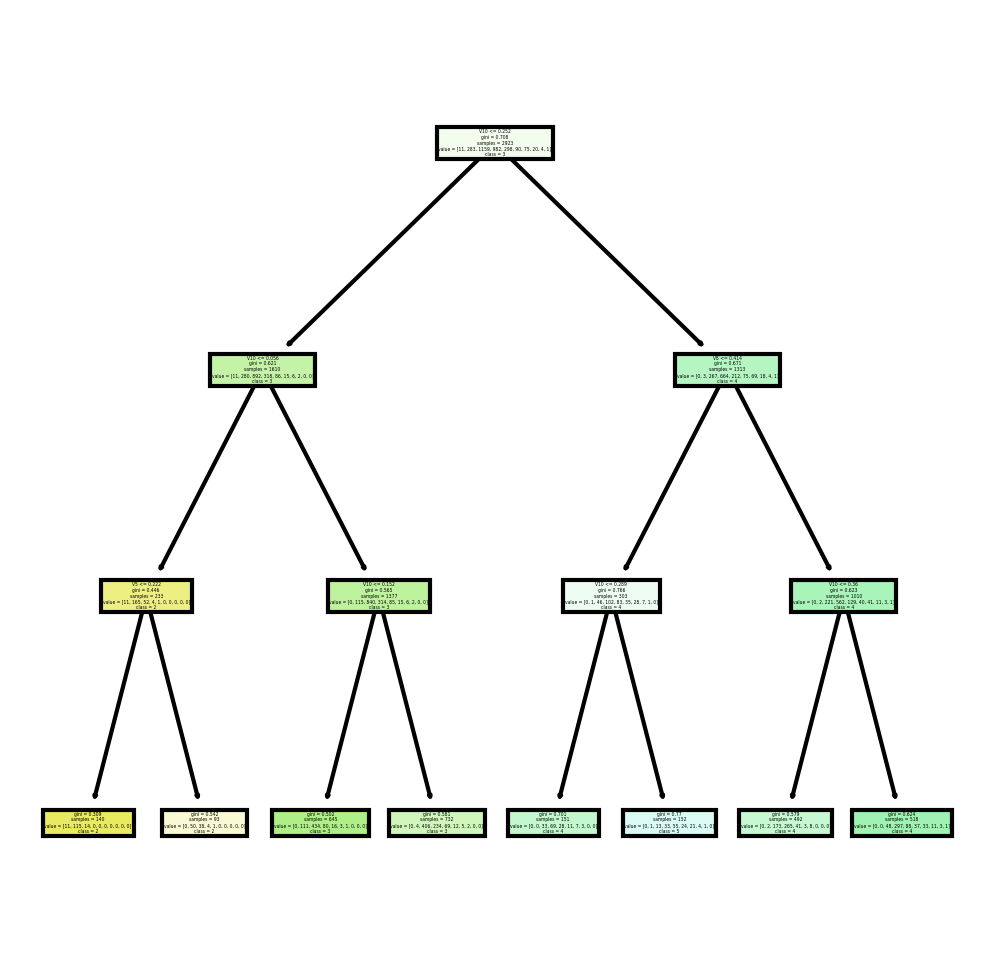

In [21]:
fn=['V1','V2','V3','V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
cn=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(AbadataDT,
feature_names = fn,
class_names=cn,
filled = True);
fig.savefig('AbadataDT.png')